In [ ]:
%cd
shutil.rmtree('/content/hands_dataset') #non usarloo

/root


In [ ]:
%cd 
%cd ../content
!pwd

/root
/content
/content


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from keras.callbacks import ModelCheckpoint


In [ ]:
mobile = keras.applications.mobilenet.MobileNet()

In [ ]:
#mobile.summary()

In [ ]:

!pwd

!git clone https://github.com/ma-tesi/hands_dataset.git

/content
Cloning into 'hands_dataset'...
remote: Enumerating objects: 2696, done.
remote: Total 2696 (delta 0), reused 0 (delta 0), pack-reused 2696
Receiving objects: 100% (2696/2696), 22.06 MiB | 21.95 MiB/s, done.
Resolving deltas: 100% (863/863), done.


In [ ]:
%cd hands_dataset
!ls


/content/hands_dataset
Dataset  Examples  LICENSE  README.md


In [ ]:
!rm -rf Examples  LICENSE  README.md
!ls

Dataset


In [ ]:
dir_path = os.path.dirname(os.path.realpath('FT_mobilenet.ipynb'))
print(dir_path)

/content/hands_dataset


In [ ]:
!pwd

/content/hands_dataset


In [ ]:
%cd /content/hands_dataset/Dataset
%mkdir train
%mkdir test
%mkdir valid
%mv 0/ 1/ 2 / 3/ 4/ 5/ 6/ 7/ 8/ 9/ train/

/content/hands_dataset/Dataset
mv: cannot move '/' to 'train': Device or resource busy


In [ ]:
#%cd -
!pwd
%cd valid
%mkdir 0/ 1/ 2 / 3/ 4/ 5/ 6/ 7/ 8/ 9/
%cd ../test
%mkdir 0/ 1/ 2 / 3/ 4/ 5/ 6/ 7/ 8/ 9/

/content/hands_dataset/Dataset
/content/hands_dataset/Dataset/valid
mkdir: cannot create directory ‘/’: File exists
/content/hands_dataset/Dataset/test
mkdir: cannot create directory ‘/’: File exists


In [ ]:

!pwd

/content/hands_dataset/Dataset/test


In [ ]:
%%bash
cd ../train
for ((i=0; i<=9; i++)); do
  a=$(find $i/ -type f | shuf -n 30)
  mv $a ../valid/$i/
  b=$(find $i/ -type f | shuf -n 5)
  mv $b ../test/$i/
done


In [ ]:
%cd ../..
!pwd

/content/hands_dataset
/content/hands_dataset


In [ ]:
train_path = 'Dataset/train'
valid_path = 'Dataset/valid'
test_path = 'Dataset/test'  

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path, target_size=(224, 224), batch_size=16)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path, target_size=(224, 224), batch_size=16)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    test_path, target_size=(224, 224), batch_size=10, shuffle=False)

Found 2172 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [ ]:
mobile = keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
x = mobile.layers[-6].output
# we take out only the last 6 layers
predictions = Dense(10, activation='softmax')(x) #si va ad aggiungere dopo l'ultimo global average pooling
# we add the output layer
SGDmodel = Model(inputs=mobile.input, outputs=predictions)


In [ ]:
for layer in SGDmodel.layers:
  layer.trainable = True


In [ ]:
SGDmodel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

## SGD OPT

In [ ]:
SGDmodel.compile(SGD(learning_rate=1e-5, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
steps=2172/16

In [ ]:
mc = ModelCheckpoint('SGDbest_model.h5', monitor='val_loss', mode='min', save_best_only=True)
history = SGDmodel.fit_generator(train_batches, steps_per_epoch=steps,validation_data=valid_batches, validation_steps=3,epochs=70, verbose=2, callbacks=mc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/70
135/135 - 47s - loss: 2.7239 - accuracy: 0.1114 - val_loss: 2.5985 - val_accuracy: 0.1250
Epoch 2/70
135/135 - 12s - loss: 2.3809 - accuracy: 0.1763 - val_loss: 2.3019 - val_accuracy: 0.2083
Epoch 3/70
135/135 - 13s - loss: 2.1399 - accuracy: 0.2555 - val_loss: 2.1891 - val_accuracy: 0.3333
Epoch 4/70
135/135 - 12s - loss: 1.9531 - accuracy: 0.3297 - val_loss: 2.0128 - val_accuracy: 0.3333
Epoch 5/70
135/135 - 12s - loss: 1.7915 - accuracy: 0.4052 - val_loss: 1.8204 - val_accuracy: 0.2917
Epoch 6/70
135/135 - 12s - loss: 1.6647 - accuracy: 0.4664 - val_loss: 1.7655 - val_accuracy: 0.3333
Epoch 7/70
135/135 - 12s - loss: 1.5518 - accuracy: 0.5239 - val_loss: 1.5883 - val_accuracy: 0.5208
Epoch 8/70
135/135 - 12s - loss: 1.4736 - accuracy: 0.5608 - val_loss: 1.5839 - val_accuracy: 0.6042
Epoch 9/70
135/135 - 12s - loss: 1.3697 - accuracy: 0.6128 - val_loss: 1.3638 - val_accuracy: 0.5625
Epoch 10/70
135/135 - 12s - loss: 1.2893 - accuracy: 0.6377 - val_loss: 1.5037 - val_accura

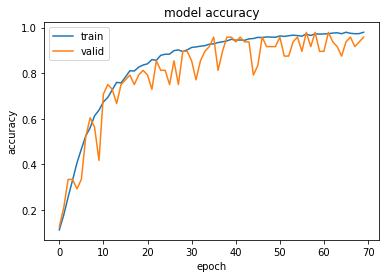

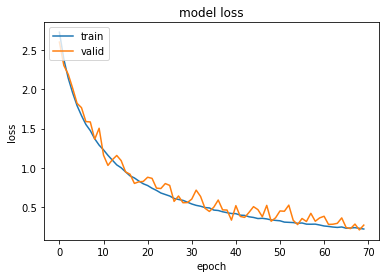

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
test_labels = test_batches.classes
predictions = SGDmodel.predict_generator(test_batches, steps=5, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [ ]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 1 4 0 0]
 [0 0 0 1 0 0 0 2 2 0]
 [0 0 0 0 0 0 0 0 0 5]]


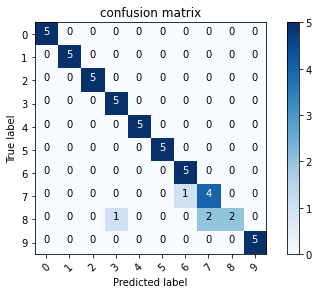

In [ ]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm, cm_plot_labels, title='confusion matrix')

In [ ]:
SGDmodel.save('BDmobile_handsRGB_model.h5')

In [ ]:
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9], dtype=int32)

In [ ]:
mobile = keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
x = mobile.layers[-6].output
# we take out only the last 6 layers
predictions = Dense(10, activation='softmax')(x) #si va ad aggiungere dopo l'ultimo global average pooling
# we add the output layer
RMSmodel = Model(inputs=mobile.input, outputs=predictions)


In [ ]:
for layer in RMSmodel.layers:
  layer.trainable = True


In [ ]:
RMSmodel.compile(RMSprop(
    learning_rate=1e-7, rho=0.9, momentum=0.95, epsilon=1e-07), loss='categorical_crossentropy', metrics=['accuracy'])
steps=2172/16

## RMSprop

In [ ]:
mc = ModelCheckpoint('RMSbest_model.h5', monitor='val_loss', mode='min', save_best_only=True)
history = RMSmodel.fit_generator(train_batches, steps_per_epoch=steps,validation_data=valid_batches, validation_steps=3,epochs=50, verbose=2, callbacks=mc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
135/135 - 15s - loss: 2.6544 - accuracy: 0.1252 - val_loss: 2.5616 - val_accuracy: 0.1250
Epoch 2/50
135/135 - 13s - loss: 2.3081 - accuracy: 0.2007 - val_loss: 2.1687 - val_accuracy: 0.1667
Epoch 3/50
135/135 - 13s - loss: 1.9949 - accuracy: 0.3140 - val_loss: 2.0536 - val_accuracy: 0.2917
Epoch 4/50
135/135 - 13s - loss: 1.7305 - accuracy: 0.4282 - val_loss: 1.6915 - val_accuracy: 0.3542
Epoch 5/50
135/135 - 13s - loss: 1.5167 - accuracy: 0.5267 - val_loss: 1.3957 - val_accuracy: 0.5000
Epoch 6/50
135/135 - 13s - loss: 1.3445 - accuracy: 0.6142 - val_loss: 1.3502 - val_accuracy: 0.6250
Epoch 7/50
135/135 - 13s - loss: 1.1892 - accuracy: 0.6763 - val_loss: 1.1368 - val_accuracy: 0.6667
Epoch 8/50
135/135 - 13s - loss: 1.0575 - accuracy: 0.7366 - val_loss: 1.0270 - val_accuracy: 0.7500
Epoch 9/50
135/135 - 13s - loss: 0.9569 - accuracy: 0.7652 - val_loss: 0.9077 - val_accuracy: 0.7292
Epoch 10/50
135/135 - 13s - loss: 0.8517 - accuracy: 0.8062 - val_loss: 0.8069 - val_accura

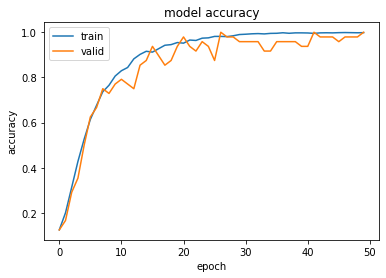

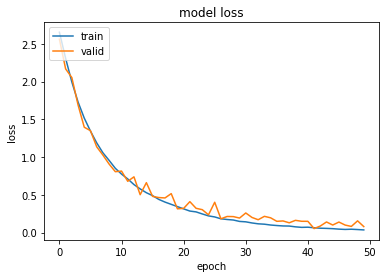

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
test_labels = test_batches.classes
predictions = RMSmodel.predict_generator(test_batches, steps=5, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [ ]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 1 4 0]
 [0 0 0 0 0 0 0 0 0 5]]


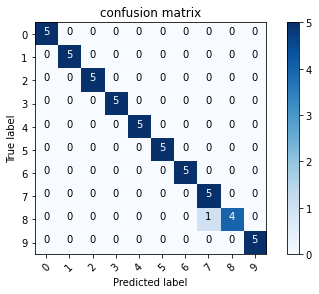

In [ ]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm, cm_plot_labels, title='confusion matrix')

In [ ]:
RMSmodel.save('RMS_last.h5')

## END